# Exploratory Data Analysis

The main objectives for this notebook are:
- Display distributions (univariate analysis)
- Investigate the relationships between variables
- Highlight insights that show benefits for music listeners
- Go through the next steps that will be used in feature engineering and machine learning

In [8]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime as dt

In [49]:
data = pd.read_csv('../data/Data - MHxM cleaned.csv')
data

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,2022-08-27 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
1,2022-08-27 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
2,2022-08-27 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
3,2022-08-27 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
4,2022-08-27 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,2022-10-30 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve
714,2022-01-11 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve
715,2022-03-11 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve
716,2022-04-11 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve


In [11]:
data.shape

(718, 32)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     718 non-null    object 
 1   Age                           718 non-null    float64
 2   Primary streaming service     718 non-null    object 
 3   Hours per day                 718 non-null    float64
 4   While working                 718 non-null    object 
 5   Instrumentalist               718 non-null    object 
 6   Composer                      718 non-null    object 
 7   Fav genre                     718 non-null    object 
 8   Exploratory                   718 non-null    object 
 9   Foreign languages             718 non-null    object 
 10  BPM                           616 non-null    float64
 11  Frequency [Classical]         718 non-null    object 
 12  Frequency [Country]           718 non-null    object 
 13  Frequ

In [58]:
genres_list = list(data.columns)[11:27]

In [35]:
# Predefine figsize
figsize1_1 = (6, 3)
figsize1_2 = (16, 4)

Text(0.5, 1.0, 'Age distribution of the participants')

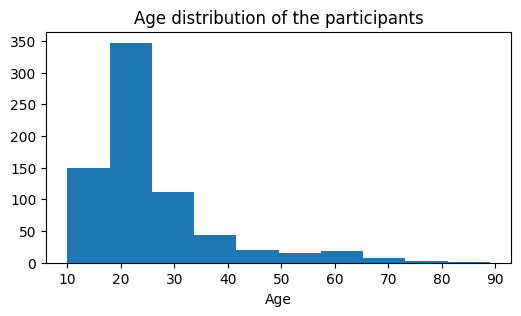

In [36]:
fig, ax0 = plt.subplots(figsize=figsize1_1)
ax0.hist(data['Age'])

ax0.set_xlabel('Age')
ax0.set_title('Age distribution of the participants')

Text(0.5, 1.0, 'Music activity distribution (hours)')

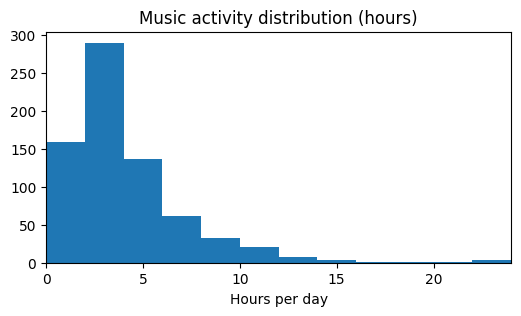

In [37]:
fig1, ax0 = plt.subplots(figsize=figsize1_1)
ax0.hist(data['Hours per day'], bins=12)

ax0.set_xlabel('Hours per day')
ax0.set_xlim(0, 24)
ax0.set_title('Music activity distribution (hours)')

Fav genre
Rock                184
Pop                 114
Metal                87
Classical            51
Video game music     43
EDM                  36
R&B                  35
Hip hop              34
Folk                 29
Country              24
Rap                  22
K pop                21
Jazz                 20
Lofi                 10
Gospel                6
Latin                 2
dtype: int64


Text(0.5, 1.0, 'Favorite genres')

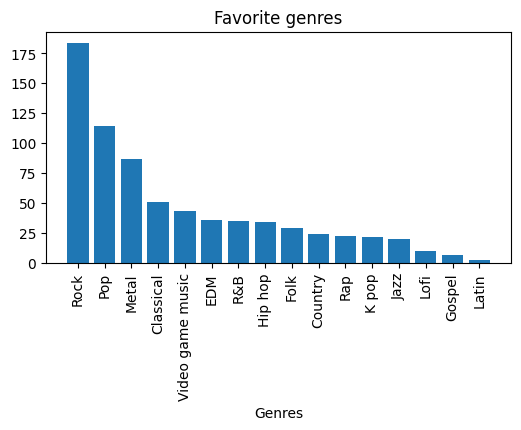

In [47]:
data_by_fave = data.groupby('Fav genre').size().sort_values(ascending=False)
print(data_by_fave)

fig2, ax0 = plt.subplots(figsize=figsize1_1)
ax0.bar(data_by_fave.index, data_by_fave)

ax0.set_xlabel('Genres')
ax0.tick_params('x', rotation=90)
ax0.set_title('Favorite genres')

In [101]:
genre_freq_map = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3}
numerical_df = data.copy()
numerical_df[genres_list] = data[genres_list].map(lambda x: genre_freq_map.get(x, x))


numerical_df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,2022-08-27 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,1,0,1,1,3,7.0,7.0,10.0,2.0,No effect
1,2022-08-27 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,2,2,0,0,0,9.0,7.0,3.0,3.0,Improve
2,2022-08-27 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,2,3,3,0,1,7.0,2.0,5.0,9.0,Improve
3,2022-08-27 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,3,3,3,3,0,8.0,8.0,7.0,7.0,Improve
4,2022-08-27 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,1,1,0,0,2,4.0,8.0,6.0,0.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,2022-10-30 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,3,0,1,3,0,7.0,6.0,0.0,9.0,Improve
714,2022-01-11 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,3,0,0,2,2,3.0,2.0,2.0,5.0,Improve
715,2022-03-11 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,2,2,2,1,1,2.0,2.0,2.0,2.0,Improve
716,2022-04-11 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,0,0,0,0,2,2.0,3.0,2.0,1.0,Improve


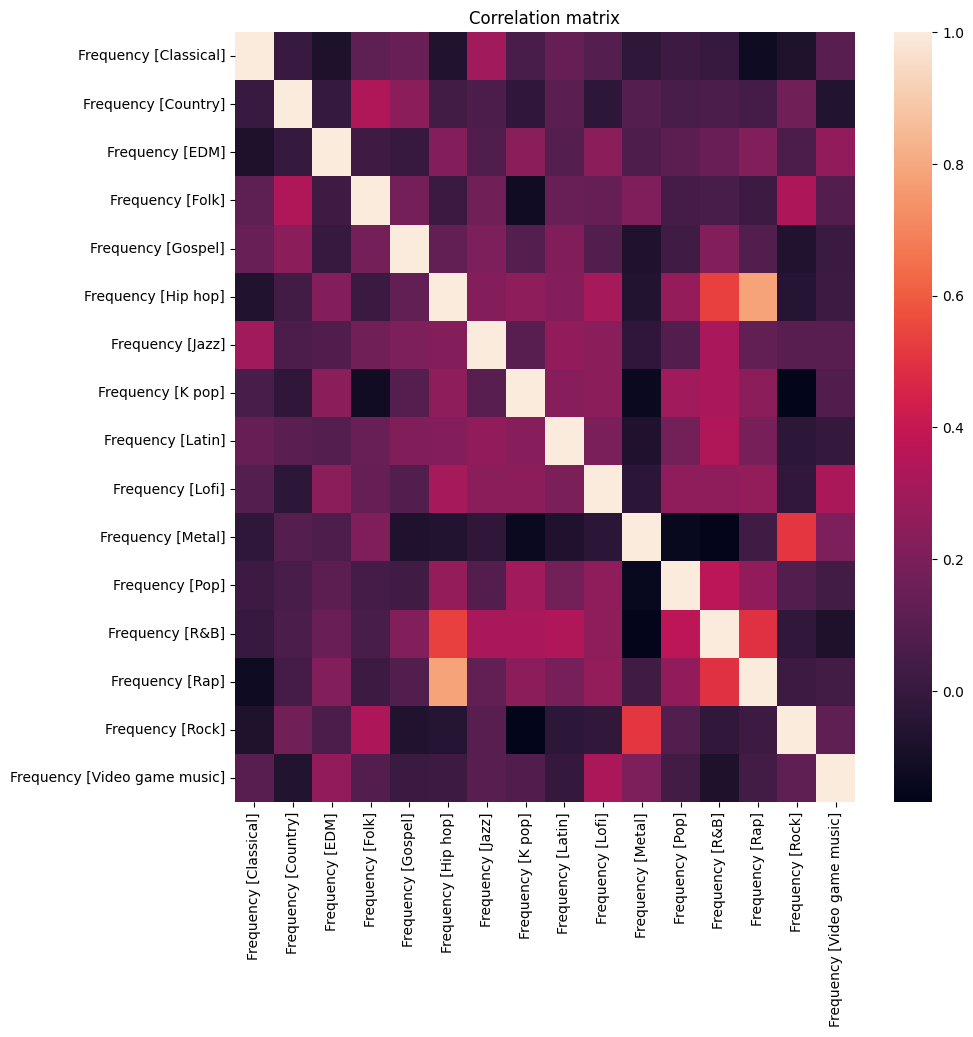

In [102]:
correl_data = data[genres_list]
correl_matrix = correl_data.corr()

fig3, ax0 = plt.subplots(figsize=(10,10))

sns.heatmap(correl_matrix)
plt.title('Correlation matrix')
plt.show()